In [201]:
import numpy as np
import numpy.linalg as la
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

In [202]:
#read in data as df
#df = pd.read_csv(r"C:\Users\Rawshan\OneDrive - University of Southampton\EE-Y3\Hackathon\dec_new_1.csv")
df = pd.read_csv(r"C:\Users\rawsh\OneDrive - University of Southampton\EE-Y3\Hackathon\dec_new_1.csv")
print(df)

    building_no  DEC_INV_SQRD   DEC_INV     AREA  DEC  \
0            15     59.171598  7.692308   1788.0   13   
1            37      9.765625  3.125000   6262.9   32   
2            13      8.650519  2.941176   7136.5   34   
3            59      8.650519  2.941176   4028.8   34   
4            35      8.163265  2.857143   3180.7   35   
5            34      6.925208  2.631579   1673.0   38   
6            19      6.250000  2.500000   1685.0   40   
7             1      6.250000  2.500000   1272.4   40   
8            54      4.725898  2.173913   4515.4   46   
9            27      4.725898  2.173913   3515.7   46   
10           52      4.526935  2.127660   1038.8   47   
11          100      4.000000  2.000000   6057.2   50   
12            7      2.441406  1.562500   4855.0   64   
13           58      2.227668  1.492537   6243.7   67   
14           36      2.040816  1.428571  17567.0   70   
15           25      2.040816  1.428571   1620.7   70   
16           30      1.929012  

In [203]:
print(df.head())
print(df.shape)
df.keys()

   building_no  DEC_INV_SQRD   DEC_INV    AREA  DEC              type  \
0           15     59.171598  7.692308  1788.0   13  district_heating   
1           37      9.765625  3.125000  6262.9   32  district_heating   
2           13      8.650519  2.941176  7136.5   34  district_heating   
3           59      8.650519  2.941176  4028.8   34       natural_gas   
4           35      8.163265  2.857143  3180.7   35  district_heating   

   annual_elec  annual_other  total_energy  typical_elec  typical_other  \
0         3.66         48.03         51.69          80.0         233.51   
1        27.81         70.10         97.91          80.0         229.79   
2        24.71         91.50        116.21          80.0         229.79   
3        17.29        108.53        125.82          80.0         235.10   
4        32.29         73.07        105.36          80.0         229.79   

   renew_elec  renew_other  co2_elec  co2_heat  co2_renew  Computers  
0       0.856          0.0         4   

Index(['building_no', 'DEC_INV_SQRD', 'DEC_INV', 'AREA', 'DEC', 'type',
       'annual_elec', 'annual_other', 'total_energy', 'typical_elec',
       'typical_other', 'renew_elec', 'renew_other', 'co2_elec', 'co2_heat',
       'co2_renew', 'Computers'],
      dtype='object')

In [204]:
df['type'] = df['type'].astype('category')
df['type'] = df['type'].cat.codes
#0 - district, 1 - grid, 2 - gas

df['Computers'] = df['Computers'].astype('category')
df['Computers'] = df['Computers'].cat.codes

In [205]:
#Seperate data columns into seperate list varaibles
b_num = df['building_no'].tolist()
dec_sqrd = df['DEC_INV_SQRD'].tolist()
dec_inv = df['DEC_INV'].tolist()
dec = df['DEC'].tolist()
area = df['AREA'].tolist()
heating_type = df['type'].tolist()
annual_elec = df['annual_elec'].tolist()
annual_other = df['annual_other'].tolist()
typical_elec = df['typical_elec'].tolist()
typical_other = df['typical_other'].tolist()
total_energy = df['total_energy'].tolist()
renew_elec = df['renew_elec'].tolist()
renew_other = df['renew_other'].tolist()
co2_elec = df['co2_elec'].tolist()
co2_heat = df['co2_heat'].tolist()
co2_renew = df['co2_renew'].tolist()
computers = df['Computers'].tolist()

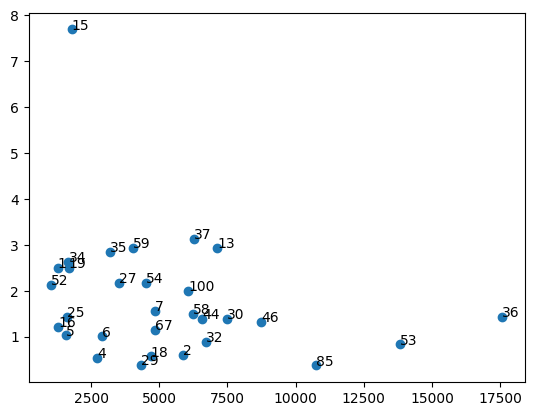

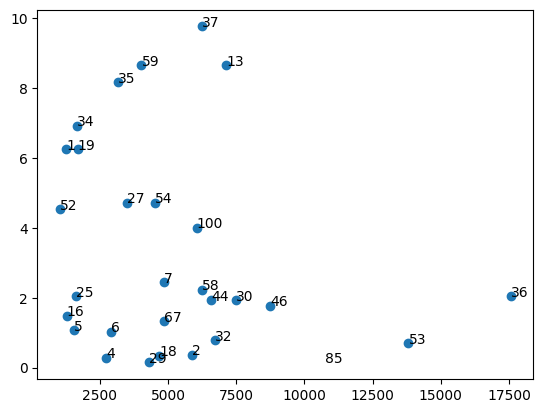

In [251]:
plt.figure(1)
plt.scatter(area, dec_inv)

for i, txt in enumerate(b_num):
    plt.annotate(txt, (area[i],dec_inv[i]))

plt.figure(2)
plt.scatter(area[1:29],dec_sqrd[1:29])
for i, txt in enumerate(b_num):
    plt.annotate(txt, (area[i],dec_sqrd[i]))

Text(0.5, 0, 'Total area')

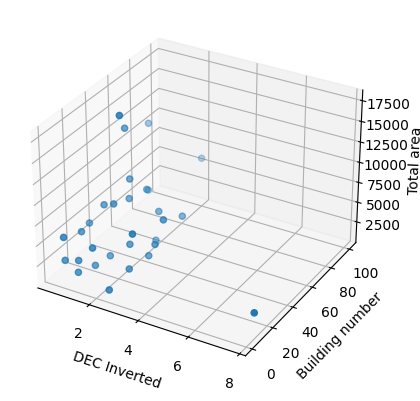

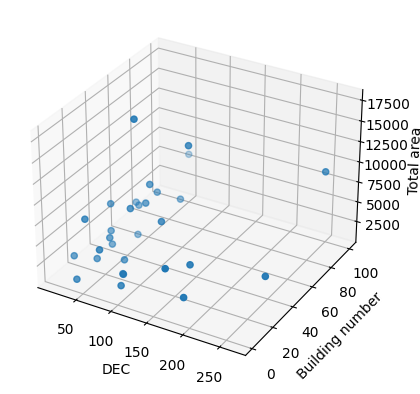

In [252]:
plt.figure(3)
ax = plt.axes(projection='3d')
ax.scatter(dec_inv, b_num, area)

ax.set_xlabel('DEC Inverted')
ax.set_ylabel('Building number')
ax.set_zlabel('Total area')

plt.figure(4)
ax = plt.axes(projection='3d')
ax.scatter(dec, b_num, area)

ax.set_xlabel('DEC')
ax.set_ylabel('Building number')
ax.set_zlabel('Total area')

In [253]:
#Normalising data such that mean is zero and standard deviation is 1
scaled_df = preprocessing.scale(df.T)

pca = PCA() #create PCA object such that it can be applied to other datasets
pca.fit(scaled_df) #do the math
pca_data = pca.transform(scaled_df) #get PCA coordinates for scaled_data

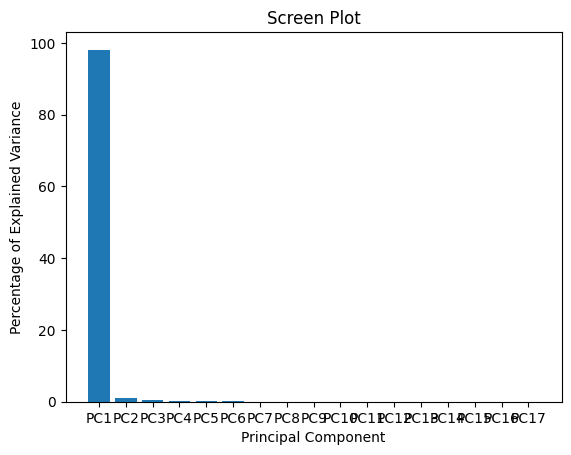

In [254]:
#construct the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Screen Plot')
plt.show()

#almost all of the variation is along the first PC so a 2D graph using 
#PC1 and PC2 should be good enough to represent the original data

In [255]:
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

print(abs(pca.components_))

[[1.83457596e-01 1.83872494e-01 1.83880909e-01 1.84040057e-01
  1.84074891e-01 1.83553863e-01 1.83636876e-01 1.82714389e-01
  1.84048817e-01 1.83936795e-01 1.64138305e-01 1.83198320e-01
  1.84090261e-01 1.83899949e-01 1.83620755e-01 1.81231545e-01
  1.83432921e-01 1.84014551e-01 1.83761388e-01 1.81402117e-01
  1.83983642e-01 1.82708044e-01 1.83090336e-01 1.83572905e-01
  1.81584827e-01 1.83187190e-01 1.81743802e-01 1.83278418e-01
  1.80957886e-01 1.82081464e-01]
 [5.47184168e-02 7.46620732e-02 7.70214562e-02 4.75578002e-02
  1.47890780e-02 1.38975034e-01 1.28600998e-01 1.82620210e-01
  5.11966787e-02 7.83942037e-02 7.68140178e-01 1.34154252e-01
  4.92125641e-02 9.40750721e-02 1.24647418e-01 2.84163771e-01
  1.04337187e-01 6.18832603e-02 1.08295667e-01 1.39840195e-01
  7.70053809e-02 1.67417901e-01 5.40815132e-02 7.74014893e-02
  1.86438028e-01 1.02361339e-01 5.75951441e-02 5.26001663e-03
  1.07806376e-01 2.00941158e-01]
 [1.53185507e-01 1.29002174e-01 1.14795779e-01 8.84076747e-02
  1.

In [256]:
pca_2 = PCA(n_components=2)
pca_2.fit(scaled_data)
x_pca=pca_2.transform(scaled_data)

print(scaled_data.shape)
print(x_pca.shape)


(30, 17)
(30, 2)


Text(0, 0.5, 'Second principle component')

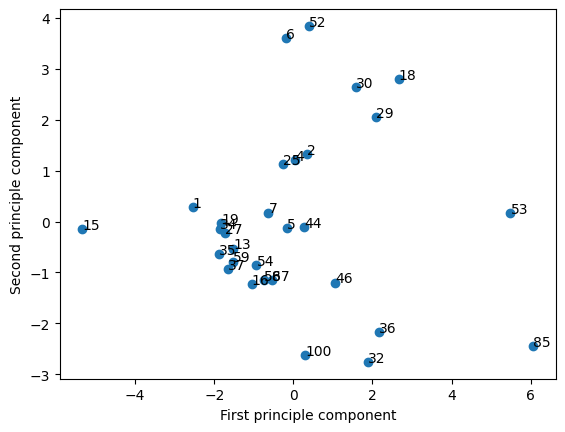

In [257]:
fig, ax = plt.subplots()
ax.scatter(x_pca[:,0],x_pca[:,1])

for i, txt in enumerate(b_num):
    plt.annotate(txt, (x_pca[:,0][i],x_pca[:,1][i]))

plt.xlabel('First principle component')
plt.ylabel('Second principle component')

(30, 1)


Text(0.5, 0, 'First principle component')

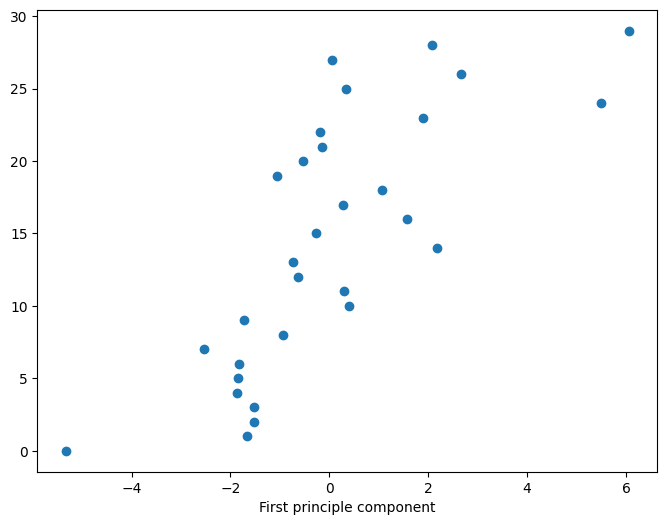

In [258]:
pca_3 = PCA(n_components=1)
pca_3.fit(x_pca)
v_pca = pca_3.transform(x_pca)
print(v_pca.shape)
plt.figure(figsize=(8,6))
plt.scatter(v_pca[:,0],list(range(0, 30,1)))
plt.xlabel('First principle component')

In [259]:
print(pca.explained_variance_ratio_)
print(pca_2.explained_variance_ratio_)
print(abs(pca_2.components_))

[9.81165690e-01 1.11997483e-02 4.29376263e-03 1.56522004e-03
 9.14770214e-04 5.45144981e-04 2.30216744e-04 3.38410085e-05
 2.94281605e-05 1.58702421e-05 6.23678909e-06 5.08856620e-08
 1.32451575e-08 6.16454238e-09 6.77797290e-10 1.36853491e-11
 1.47255071e-34]
[0.29311192 0.1669988 ]
[[0.16247554 0.26410438 0.33021959 0.29559923 0.31987398 0.06563213
  0.23016584 0.26177445 0.34251413 0.07344005 0.05673696 0.02693945
  0.07045992 0.32087593 0.36232253 0.32712463 0.08018277]
 [0.27680554 0.03737803 0.07362689 0.22544977 0.09826754 0.05851569
  0.26327604 0.37345896 0.24632786 0.46216149 0.34050666 0.1163379
  0.18038385 0.32086012 0.08771638 0.06026522 0.30545218]]
